In [1]:
# -*- coding: utf-8 -*-
"""
play around
"""
import getpass
import os
import pickle as cp
import sys
import time
import itertools as it
import matplotlib.pyplot as plt

%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd
from random import uniform
from matplotlib import rcParams 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print "done"

done


(200, 200)

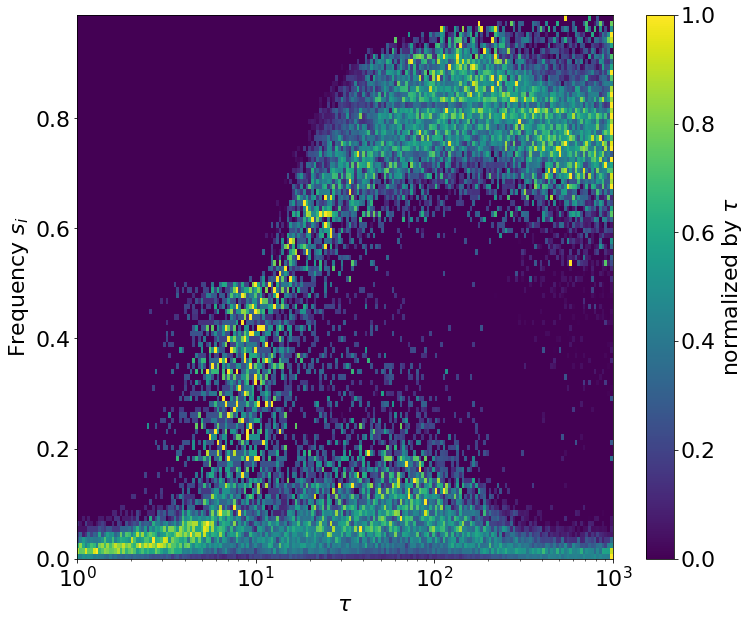

In [55]:

loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(200)], 
               axis= 1, keys = np.logspace(0,3,200))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,200),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,200),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#fig.savefig('ttb_bara100_3_log03_200_s200.pdf')
#print norm_data[0,:]

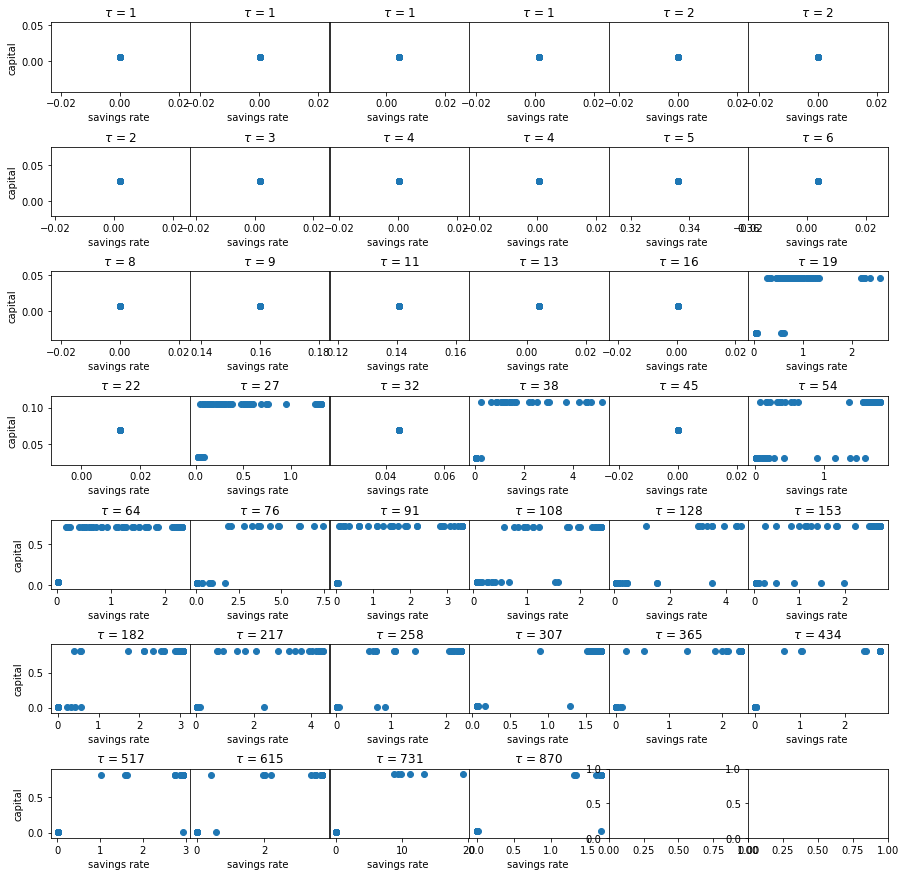

In [57]:
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()

k1 = pd.concat([ pd.concat([xm[j][i]['k'] for i in range(1)]) for j in range(200)], 
               axis= 1, keys = range(200))

s1 = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(1)]) for j in range(200)], 
               axis= 1, keys = range(200))
#format is tau0 | tau1 | tau2....
#        agent1
#        agent 2..
#        agent N
#        agent N+1
#
rcParams.update({'font.size': 10})

fig, axs = plt.subplots(7,6, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.001)

axs = axs.ravel()

for a,i in enumerate(range(0,200,5)):
    axs[a].scatter(k1[i],s1[i])
    axs[a].set_title(r'$\tau$ = %s'%(np.int(np.logspace(0,3,200)[i])))
    axs[a].set_xlabel('savings rate ')
    axs[a].set_ylabel('capital')
    if a%6!=0: 
        axs[a].yaxis.set_visible(False)
fig.savefig('k_s_ttb_bara100_3_log03_200_s200.pdf')

In [58]:
s1

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.005747,0.012716,0.017779,0.032872,0.010457,0.008304,0.020466,0.000554,0.004682,0.00002,...,0.015492,0.828979,0.785950,0.007865,0.001404,0.005842,0.001919,0.005494,0.886816,0.036026
1,0.005747,0.012716,0.017779,0.032872,0.010457,0.008304,0.020466,0.000554,0.004682,0.00002,...,0.015492,0.012785,0.023033,0.007865,0.001404,0.005842,0.001919,0.005494,0.000070,0.036026
2,0.005747,0.012716,0.017779,0.032872,0.010457,0.008304,0.020466,0.000554,0.004682,0.00002,...,0.015492,0.012785,0.785950,0.007865,0.001404,0.707103,0.001919,0.774740,0.000070,0.742671
3,0.005747,0.012716,0.017779,0.032872,0.010457,0.008304,0.020466,0.000554,0.004682,0.00002,...,0.015492,0.012785,0.023033,0.007865,0.883763,0.707103,0.001919,0.005494,0.000070,0.036026
4,0.005747,0.012716,0.017779,0.032872,0.010457,0.008304,0.020466,0.000554,0.004682,0.00002,...,0.015492,0.012785,0.023033,0.007865,0.625611,0.707103,0.001919,0.005494,0.886816,0.742671
5,0.005747,0.012716,0.017779,0.032872,0.010457,0.008304,0.020466,0.000554,0.004682,0.00002,...,0.015492,0.012785,0.023033,0.007865,0.625611,0.707103,0.915624,0.774740,0.886816,0.036026
6,0.005747,0.012716,0.017779,0.032872,0.010457,0.008304,0.020466,0.000554,0.004682,0.00002,...,0.015492,0.828979,0.785950,0.007865,0.625611,0.707103,0.001919,0.005494,0.000070,0.742671
7,0.005747,0.012716,0.017779,0.032872,0.010457,0.008304,0.020466,0.000554,0.004682,0.00002,...,0.015492,0.828979,0.023033,0.007865,0.625611,0.005842,0.001919,0.774740,0.886816,0.036026
8,0.005747,0.012716,0.017779,0.032872,0.010457,0.008304,0.020466,0.000554,0.004682,0.00002,...,0.015492,0.828979,0.785950,0.007865,0.001404,0.707103,0.001919,0.005494,0.000070,0.036026
9,0.005747,0.012716,0.017779,0.032872,0.010457,0.008304,0.020466,0.000554,0.004682,0.00002,...,0.015492,0.012785,0.023033,0.007865,0.001404,0.005842,0.001919,0.774740,0.000070,0.036026


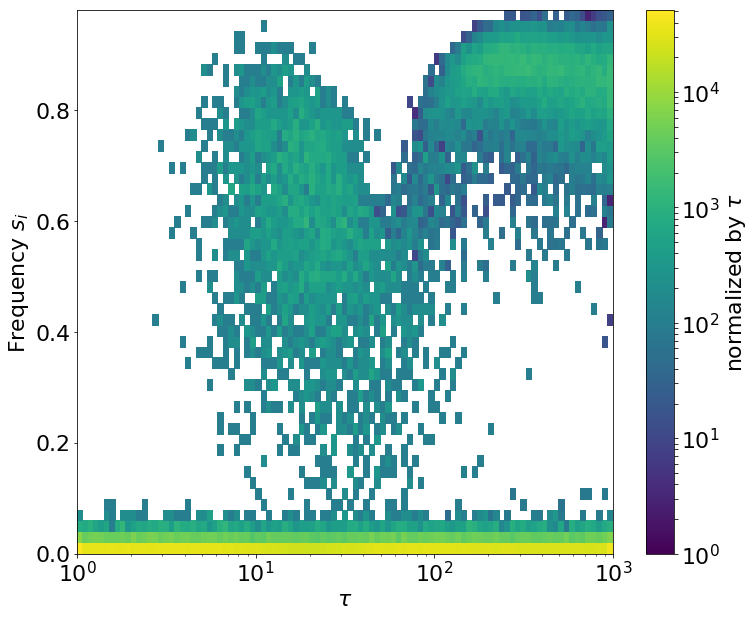

In [17]:
import matplotlib.colors as colors

fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (heatmap.T),  cmap='viridis',norm=colors.LogNorm(vmin=heatmap.min()+1, 
                                                                                     vmax=heatmap.max()))
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')

(200, 200)

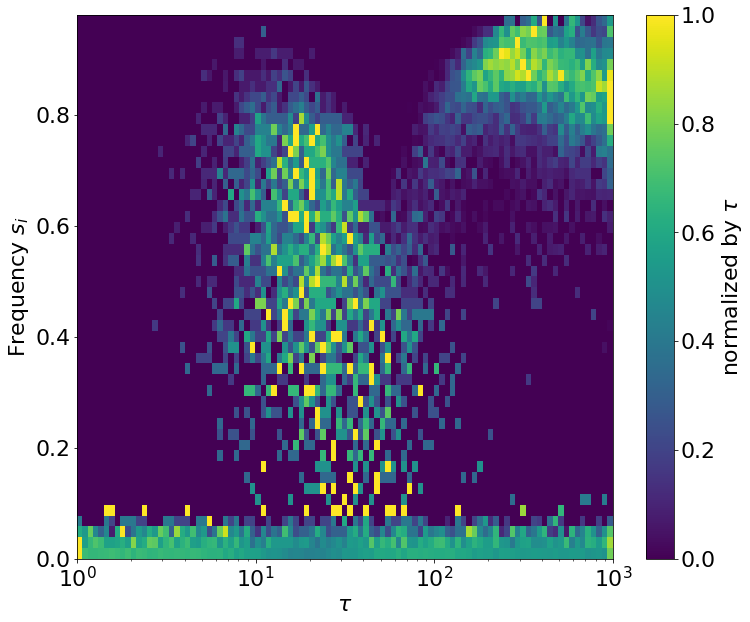

In [16]:
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2logfully/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(200)], 
               axis= 1, keys = np.logspace(0,3,200))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,200),200*100), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),50])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
#fig.savefig('ttb_fully_log03_200_s200.pdf')

(100, 200)

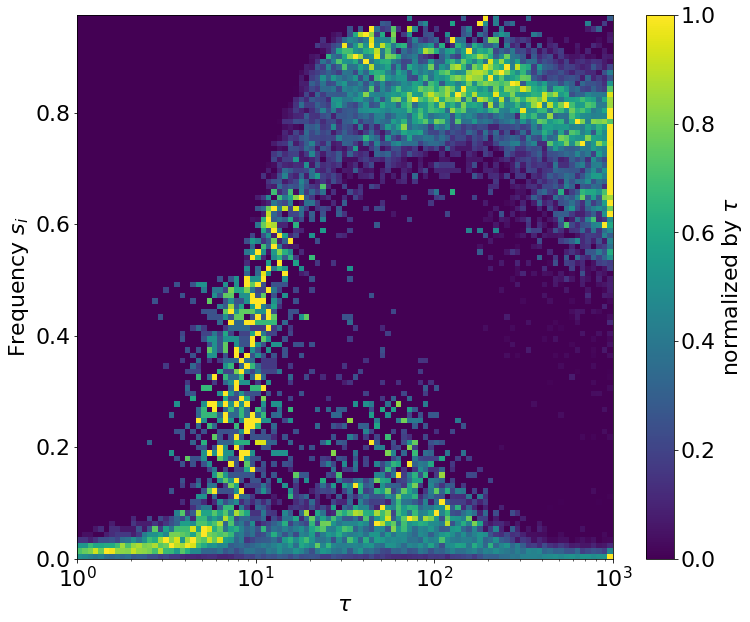

In [28]:
loc = '/home/yuki/Dropbox/Unizeugs/Fernuni/BA/code/pysave/experiments/output_data/X2log_N200/'
name= 'parameter_scan_all_si'
x = np.load(loc+name)
x = x.replace([np.inf, -np.inf], np.nan)
#df = pd.DataFrame(x.as_matrix())
xm = x.as_matrix()
xm.shape
df = pd.concat([ pd.concat([xm[j][i]['s'] for i in range(200)]) for j in range(100)], 
               axis= 1, keys = np.logspace(0,3,100))
heatmap, xedges, yedges = np.histogram2d(np.repeat(
                                            np.logspace(0,3,100),200*200), # tauspace, nsamples * nagents
                                            df.values.T.ravel(), 
                                            bins=[np.logspace(0,3,100),100])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
rcParams.update({'font.size': 22})
plt.clf()
#plt.imshow(heatmap.T)
fig,ax = plt.subplots()
fig.set_size_inches((12,10))
data = heatmap.T
norm_data = (data - 0) / np.max(data, axis=1)[:, np.newaxis]
im2 = ax.pcolormesh(xedges,yedges , (norm_data),  cmap='viridis')
#im2 = ax.pcolormesh(np.rot90(norm_data.T),extent=extent, interpolation='none', cmap='viridis')

fig.colorbar(im2, ax=ax, label=r'normalized by $\tau$')
ax.set_ylabel(r'Frequency $s_i$')
ax.set_xlabel(r'$\tau$')
ax.set_aspect('auto')
ax.set_xscale('log')
fig.savefig('ttb_bara200_03_log03_200_s200.pdf')

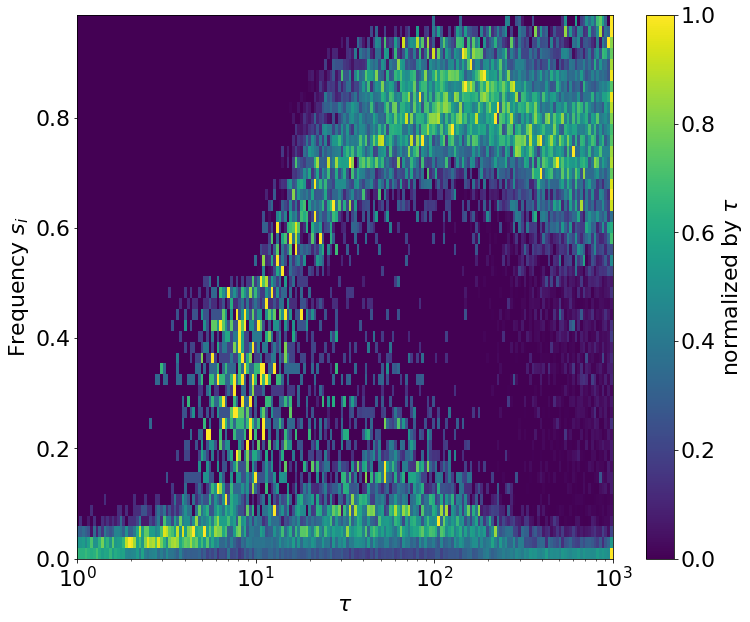